<a href="https://colab.research.google.com/github/jcsontos/colaboratory/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from vega_datasets import data
import pandas as pd


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
nike_data={'year':[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],'revenue':[13700,14995,16326,18627,18528,18324,20117,23331,25313,27799,30601,32376,34350,36393,39117,37403,44538,46710]}

In [ ]:
df = pd.DataFrame(nike_data)
df.head()

,year,revenue
0,2005,13700
1,2006,14995
2,2007,16326
3,2008,18627
4,2009,18528


In [ ]:
df0 = data.cars()
df0.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [ ]:
  df1 = df0.sort_values('Horsepower', ascending=False)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Drop rows with NaN
df1.dropna(subset=['Horsepower', 'Miles_per_Gallon'], inplace=True)

In [ ]:
# Transform data
x = df['year'].to_numpy().reshape(-1, 1)
y = df['revenue'].to_numpy().reshape(-1, 1)

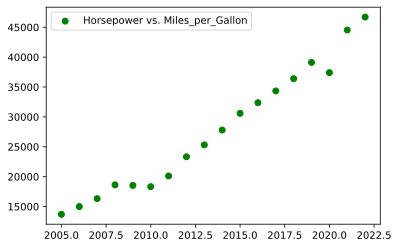

In [ ]:
plt.scatter(x, y, c='g', label='Horsepower vs. Miles_per_Gallon')
plt.legend()
plt.show()

In [ ]:
# Enable interactive plot
#%matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
# Enable interactive plot
%matplotlib inline

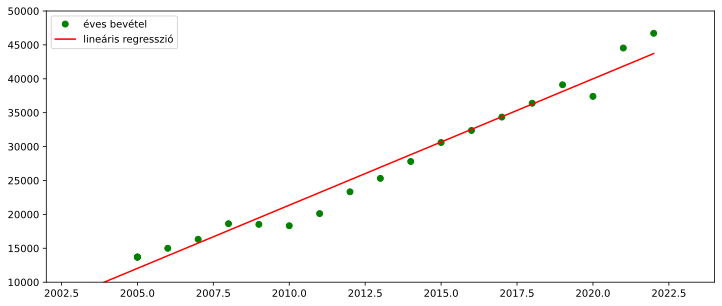

In [ ]:
x_data = []
y_data = []

fig, ax = plt.subplots(figsize=(12,5))     # A tuple unpacking to unpack the only fig
ax.set_xlim(2002, 2024)
ax.set_ylim(10000, 50000)

#fig = plt.figure(figsize=(12,5))
#ax1 = plt.subplot(1,2,1)   
#ax2 = plt.subplot(1,2,2)

# Plotting 
scatter, = ax.plot([], [], 'go', label='éves bevétel')
line, = ax.plot([], [], 'r', label='lineáris regresszió')
ax.legend(loc='upper left')

reg = LinearRegression()

def animate(frame_num):
    # Adding data
    x_data.append(x[frame_num])
    y_data.append(y[frame_num])
    # Convert data to numpy array
    x_train = np.array(x_data).reshape(-1, 1)
    y_train = np.array(y_data).reshape(-1, 1)
    # Fit values to a linear regression
    reg.fit(x_train, y_train)

    # update data for scatter plot
    scatter.set_data((x_data, y_data))
    # Predict value and update data for line plot
    line.set_data((list(range(2003,2023)), reg.predict(np.array([entry for entry in range(2003,2023)]).reshape(-1, 1))))

#anim = FuncAnimation(fig, animate, frames=len(x), interval=20)
anim = FuncAnimation(fig, animate, frames=len(x), interval=1000)

#plt.show()
from IPython.display import HTML
HTML(anim.to_html5_video())